### Student Information
Name:莊喻捷

Student ID:107061538

GitHub ID:chuangyc

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here



In [2]:
# necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import plotly.graph_objs as go
import plotly.express as px
#import plotly.plotly as py
# import plotly.graph_objs as go
import math
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
%matplotlib inline

# my functionsb
import helpers.data_mining_helpers as dmh
# import helpers.text_analysis as ta

## 2. Data Preparation

In [3]:
# categories
categories = ['sentence', 'score']
#yelp_data.columns = categories

In [4]:
yelp_data = pd.read_table('data/yelp_labelled.txt', names=categories)
amazon_data = pd.read_table('data/amazon_cells_labelled.txt', names=categories)
imdb_data =  pd.read_table('data/imdb_labelled.txt', sep='\s{2,}', names=categories, engine='python')


In [5]:
data = pd.concat([yelp_data,amazon_data,imdb_data], axis=0, ignore_index=True)

In [6]:
data[0:2]

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [7]:
data.columns

Index(['sentence', 'score'], dtype='object')

In [8]:
len(data)

3000

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
sentence    3000 non-null object
score       3000 non-null int64
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [10]:
data.shape

(3000, 2)

In [11]:
print(" ".join(data.loc[0,'sentence'].split(" ")))

Wow... Loved this place.


## 3. Data Transformation


In [12]:
data[0:2]

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0


In [13]:
for t in data["sentence"][:3]:
    print(t)

Wow... Loved this place.
Crust is not good.
Not tasty and the texture was just nasty.


In [14]:
data[0:10]

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [15]:
data[0:10][[ "score","sentence"]]

,score,sentence
0,1,Wow... Loved this place.
1,0,Crust is not good.
2,0,Not tasty and the texture was just nasty.
3,1,Stopped by during the late May bank holiday of...
4,1,The selection on the menu was great and so wer...
5,0,Now I am getting angry and I want my damn pho.
6,0,Honeslty it didn't taste THAT fresh.)
7,0,The potatoes were like rubber and you could te...
8,1,The fries were great too.
9,1,A great touch.


In [16]:
data[-10:]

,sentence,score
2990,"The opening sequence of this gem is a classic,...",1
2991,Fans of the genre will be in heaven.,1
2992,Lange had become a great actress.,1
2993,It looked like a wonderful story.,1
2994,I never walked out of a movie faster.,0
2995,I just got bored watching Jessice Lange take h...,0
2996,"Unfortunately, any virtue in this film's produ...",0
2997,"In a word, it is embarrassing.",0
2998,Exceptionally bad!,0
2999,All in all its an insult to one's intelligence...,0


In [17]:
data.iloc[::10][:10]

,sentence,score
0,Wow... Loved this place.,1
10,Service was very prompt.,1
20,The Burrittos Blah!,0
30,"Also there are combos like a burger, fries, an...",1
40,The shrimp tender and moist.,1
50,We ordered the duck rare and it was pink and t...,1
60,At least think to refill my water before I str...,0
70,"The deal included 5 tastings and 2 drinks, and...",1
80,Coming here is like experiencing an underwhelm...,0
90,"In summary, this was a largely disappointing d...",0


In [18]:
data.loc[::10, 'sentence'][:10]

0                              Wow... Loved this place.
10                             Service was very prompt.
20                                  The Burrittos Blah!
30    Also there are combos like a burger, fries, an...
40                         The shrimp tender and moist.
50    We ordered the duck rare and it was pink and t...
60    At least think to refill my water before I str...
70    The deal included 5 tastings and 2 drinks, and...
80    Coming here is like experiencing an underwhelm...
90    In summary, this was a largely disappointing d...
Name: sentence, dtype: object

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [19]:
#first pick sentence column, then select 200, 199, 198... 191
data['sentence'][200:190:-1]

200    I had heard good things about this place, but ...
199                               It is worth the drive.
198                                 Very friendly staff.
197    I've never been more insulted or felt disrespe...
196             The live music on Fridays totally blows.
195        The best place to go for a tasty bowl of Pho!
194    I'm not really sure how Joey's was voted best ...
193    I had a salad with the wings, and some ice cre...
192    When my order arrived, one of the gyros was mi...
191                Both of the egg rolls were fantastic.
Name: sentence, dtype: object

### ** >>> Exercise 3 (5 min): **  
Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [20]:
# Answer here
#fetch records which scores are 1 and query every 10th record. Only show the first 5 records. 
data[data['score']==1][::10][0:5]

,sentence,score
0,Wow... Loved this place.,1
23,I could care less... The interior is just beau...,1
40,The shrimp tender and moist.,1
55,"Loved it...friendly servers, great food, wonde...",1
70,"The deal included 5 tastings and 2 drinks, and...",1


## 4. Data Mining using Pandas

In [21]:
data.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [22]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

### >>> **Exercise 4 (5 min):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [23]:
data.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
5       (The amoung of missing records is: , 0)
6       (The amoung of missing records is: , 0)
7       (The amoung of missing records is: , 0)
8       (The amoung of missing records is: , 0)
9       (The amoung of missing records is: , 0)
10      (The amoung of missing records is: , 0)
11      (The amoung of missing records is: , 0)
12      (The amoung of missing records is: , 0)
13      (The amoung of missing records is: , 0)
14      (The amoung of missing records is: , 0)
15      (The amoung of missing records is: , 0)
16      (The amoung of missing records is: , 0)
17      (The amoung of missing records is: , 0)
18      (The amoung of missing records is: , 0)
19      (The amoung of missing records is: , 0)
20      (The amoung of missing records i

In [24]:
dummy_series = pd.Series(["dummy_record"], index=["sentence"])

In [25]:
dummy_series

sentence    dummy_record
dtype: object

In [26]:
result_with_series = data.append(dummy_series, ignore_index=True)

In [27]:
print(len(data))
print(len(result_with_series))

3000
3001


In [28]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
dtype: object

In [29]:
# dummy record as dictionary format
dummy_dict = [{'sentence': 'dummy_record'

              }]

In [30]:
data = data.append(dummy_dict, ignore_index=True)

In [31]:
len(data)

3001

In [32]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 1)
dtype: object

In [33]:
data.dropna(inplace=True)

In [34]:
data.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [35]:
len(data)

3000

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [36]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [37]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [38]:
# Answer here


#### Answer
isnull() will find the following missing values
* NaN in numeric arrays
* None or NaN in object arrays
* NaT in datetimelike
on the above missing example: 
A means the NAN in numeric arrays.
B means None in object arrays
C means a string contains 'None'
D means a string contains 'NaN'
E means a None in object arrays
F means a empty string

In [39]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [40]:
sum(data.duplicated())

18

In [41]:
sum(data.duplicated('sentence'))

18

In [42]:

print(data[data.duplicated()])

                                               sentence  score
814                                  I love this place.    1.0
816                              The food was terrible.    0.0
843                                    I won't be back.    0.0
846                   I would not recommend this place.    0.0
1285                                      Great phone!.    1.0
1407                                       Works great.    1.0
1524                                      Works great!.    1.0
1543                            Don't buy this product.    0.0
1744  If you like a loud buzzing to override all you...    0.0
1748                                      Does not fit.    0.0
1778                              This is a great deal.    1.0
1792                                       Great Phone.    1.0
1892                   Excellent product for the price.    1.0
1896                                       Great phone.    1.0
2105                                Very disappointing.

In [43]:
#We found that it only show one of the duplicated data
#use keep=False to show all the duplicated data
print(sum(data.duplicated(keep=False)))
print(data[data.duplicated(keep=False)])


36
                                               sentence  score
334                                  I love this place.    1.0
380                                    I won't be back.    0.0
383                              The food was terrible.    0.0
505                   I would not recommend this place.    0.0
814                                  I love this place.    1.0
816                              The food was terrible.    0.0
843                                    I won't be back.    0.0
846                   I would not recommend this place.    0.0
1018                                      Works great!.    1.0
1179  If you like a loud buzzing to override all you...    0.0
1180                            Don't buy this product.    0.0
1187                                      Great phone!.    1.0
1262                                       Works great.    1.0
1285                                      Great phone!.    1.0
1290                                       Great Pho

In [44]:
data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [45]:
len(data)
#3000-36=2964

2964

## 5.  Data Preprocessing
In the Data Mining course we learned about the many ways of performing data preprocessing. In reality, the list is quiet general as the specifics of what data preprocessing involves is too much to cover in one course. This is especially true when you are dealing with unstructured data, as we are dealing with in this particular notebook. But let us look at some examples for each data preprocessing technique that we learned in the class. We will cover each item one by one, and provide example code for each category. You will learn how to peform each of the operations, using Pandas, that cover the essentials to Preprocessing in Data Mining. We are not going to follow any strict order, but the items we will cover in the preprocessing section of this notebook are as follows:

- Aggregation
- Sampling
- Dimensionality Reduction
- Feature Subset Selection
- Feature Creation
- Discretization and Binarization
- Attribute Transformation

In [46]:
data_sample = data.sample(n=1000) #random state

In [47]:
len(data_sample)

1000

In [48]:
data_sample[0:5]

,sentence,score
549,My boyfriend and I came here for the first tim...,1.0
2654,There still are good actors around!,1.0
1571,This fixes all the problems.,1.0
2257,It was so funny.,1.0
2115,"The scenes with the ""oh-so-mature"" neighbour-g...",0.0


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [49]:
# Answer here
#The index are different

0.0    1484
1.0    1480
Name: score, dtype: int64


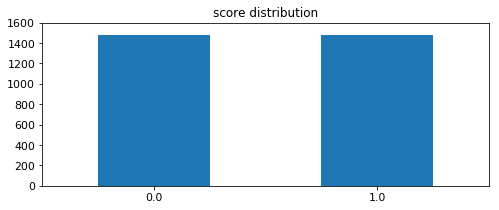

In [50]:
print(data.score.value_counts())

# plot barchart for data
data.score.value_counts().plot(kind = 'bar',
                                    title = 'score distribution',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

1.0    513
0.0    487
Name: score, dtype: int64


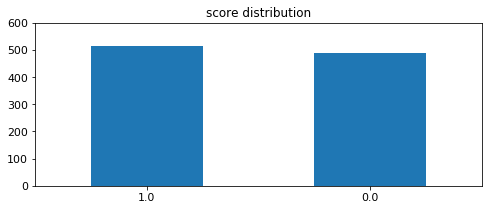

In [51]:
print(data_sample.score.value_counts())

# plot barchart for data_sample
data_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'score distribution',
                                    ylim = [0, 600],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

### >>> **Exercise 7 (5 min):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

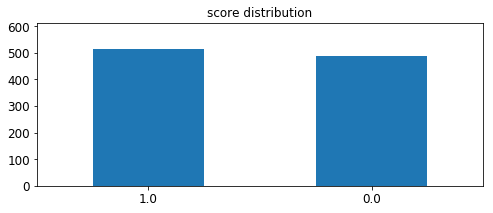

In [52]:
# Answer here
#we set ylim as the maximum of values add 100 instead of hardcoding
# plot barchart for data_sample
data_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'score distribution',
                                           ylim = [0, max(data_sample.score.value_counts())+100], 
                                           rot = 0, fontsize = 12, figsize = (8,3))



### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

1.0    513
0.0    487
Name: score, dtype: int64


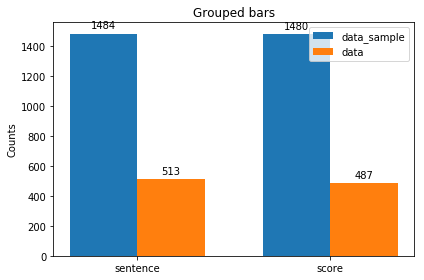

In [53]:
import numpy as np

# Answer here
labels = categories
print(data_sample.score.value_counts())
men_means = data.score.value_counts()
women_means = data_sample.score.value_counts()

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='data_sample')
rects2 = ax.bar(x + width/2, women_means, width, label='data')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Grouped bars')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [54]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JackChuang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [55]:
# takes a like a minute or two to process
data['unigrams'] = data['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [56]:
data[0:4]["unigrams"]

0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [57]:
data[0:4]

,sentence,score,unigrams
0,Wow... Loved this place.,1.0,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0.0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0.0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1.0,"[Stopped, by, during, the, late, May, bank, ho..."


In [58]:
list(data[0:1]['unigrams'])

[['Wow', '...', 'Loved', 'this', 'place', '.']]

In [59]:
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence)

In [60]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")


['hello', 'world']

### **>>> Exercise 9 (5 min):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [61]:
# Answer here
analyze(data.iloc[0].sentence)

['wow', 'loved', 'this', 'place']

In [62]:
# We can check the shape of this matrix by:
data_counts.shape

(2964, 5153)

In [63]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [64]:
data[0:5]

,sentence,score,unigrams
0,Wow... Loved this place.,1.0,"[Wow, ..., Loved, this, place, .]"
1,Crust is not good.,0.0,"[Crust, is, not, good, .]"
2,Not tasty and the texture was just nasty.,0.0,"[Not, tasty, and, the, texture, was, just, nas..."
3,Stopped by during the late May bank holiday of...,1.0,"[Stopped, by, during, the, late, May, bank, ho..."
4,The selection on the menu was great and so wer...,1.0,"[The, selection, on, the, menu, was, great, an..."


In [65]:
# we convert from sparse array to normal array
data_counts[4, 0:500].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

### **>>> Exercise 10 (take home):**


In [66]:
# Answer
#we will find what voc the second '1' element represent
data_counts[4, 0:4000].toarray()
np.array(count_vect.get_feature_names())[np.where(data_counts[4, 0:3000].toarray()==1)[1][1]]
#np.where(data_counts[4, 0:4000].toarray()==1)

'great'

In [67]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [69]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

In [70]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [71]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:20]]

In [72]:
plot_z = data_counts[0:20, 0:20].toarray()

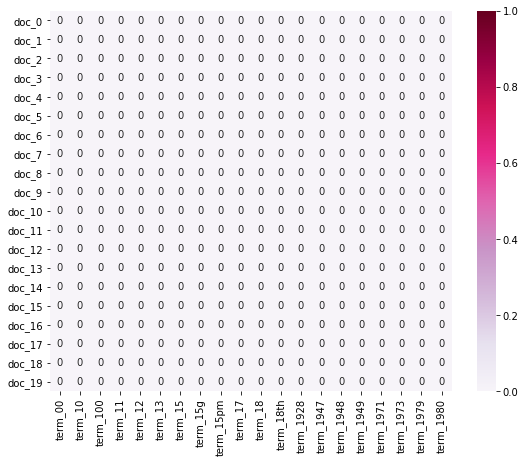

In [73]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

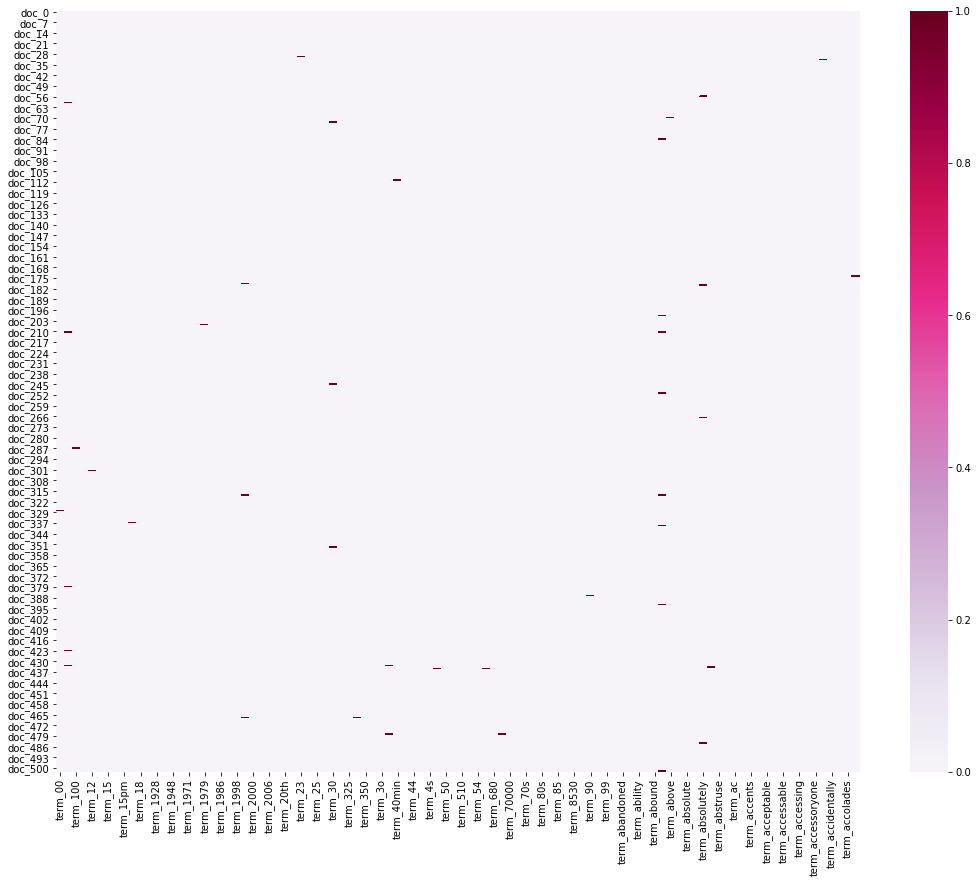

In [74]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:100]]
plot_y = ["doc_"+ str(i) for i in list(data.index)[0:500]]
plot_z = data_counts[0:500, 0:100].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(18, 14))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=False)

In [75]:
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())

In [76]:
data_reduced.shape

(2964, 2)

In [77]:
categories

['sentence', 'score']

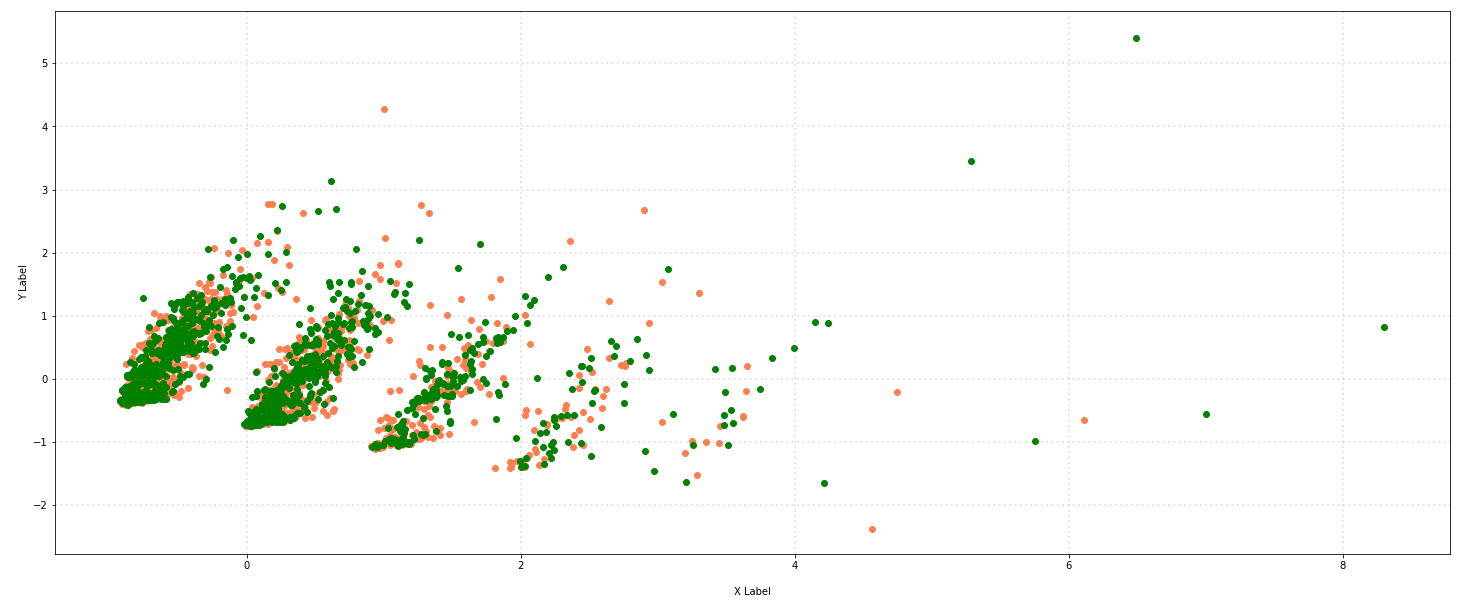

In [78]:
col = ['coral', 'green']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, s in zip(col, [0,1]):
    xs = data_reduced[data['score'] == s].T[0]
    ys = data_reduced[data['score'] == s].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

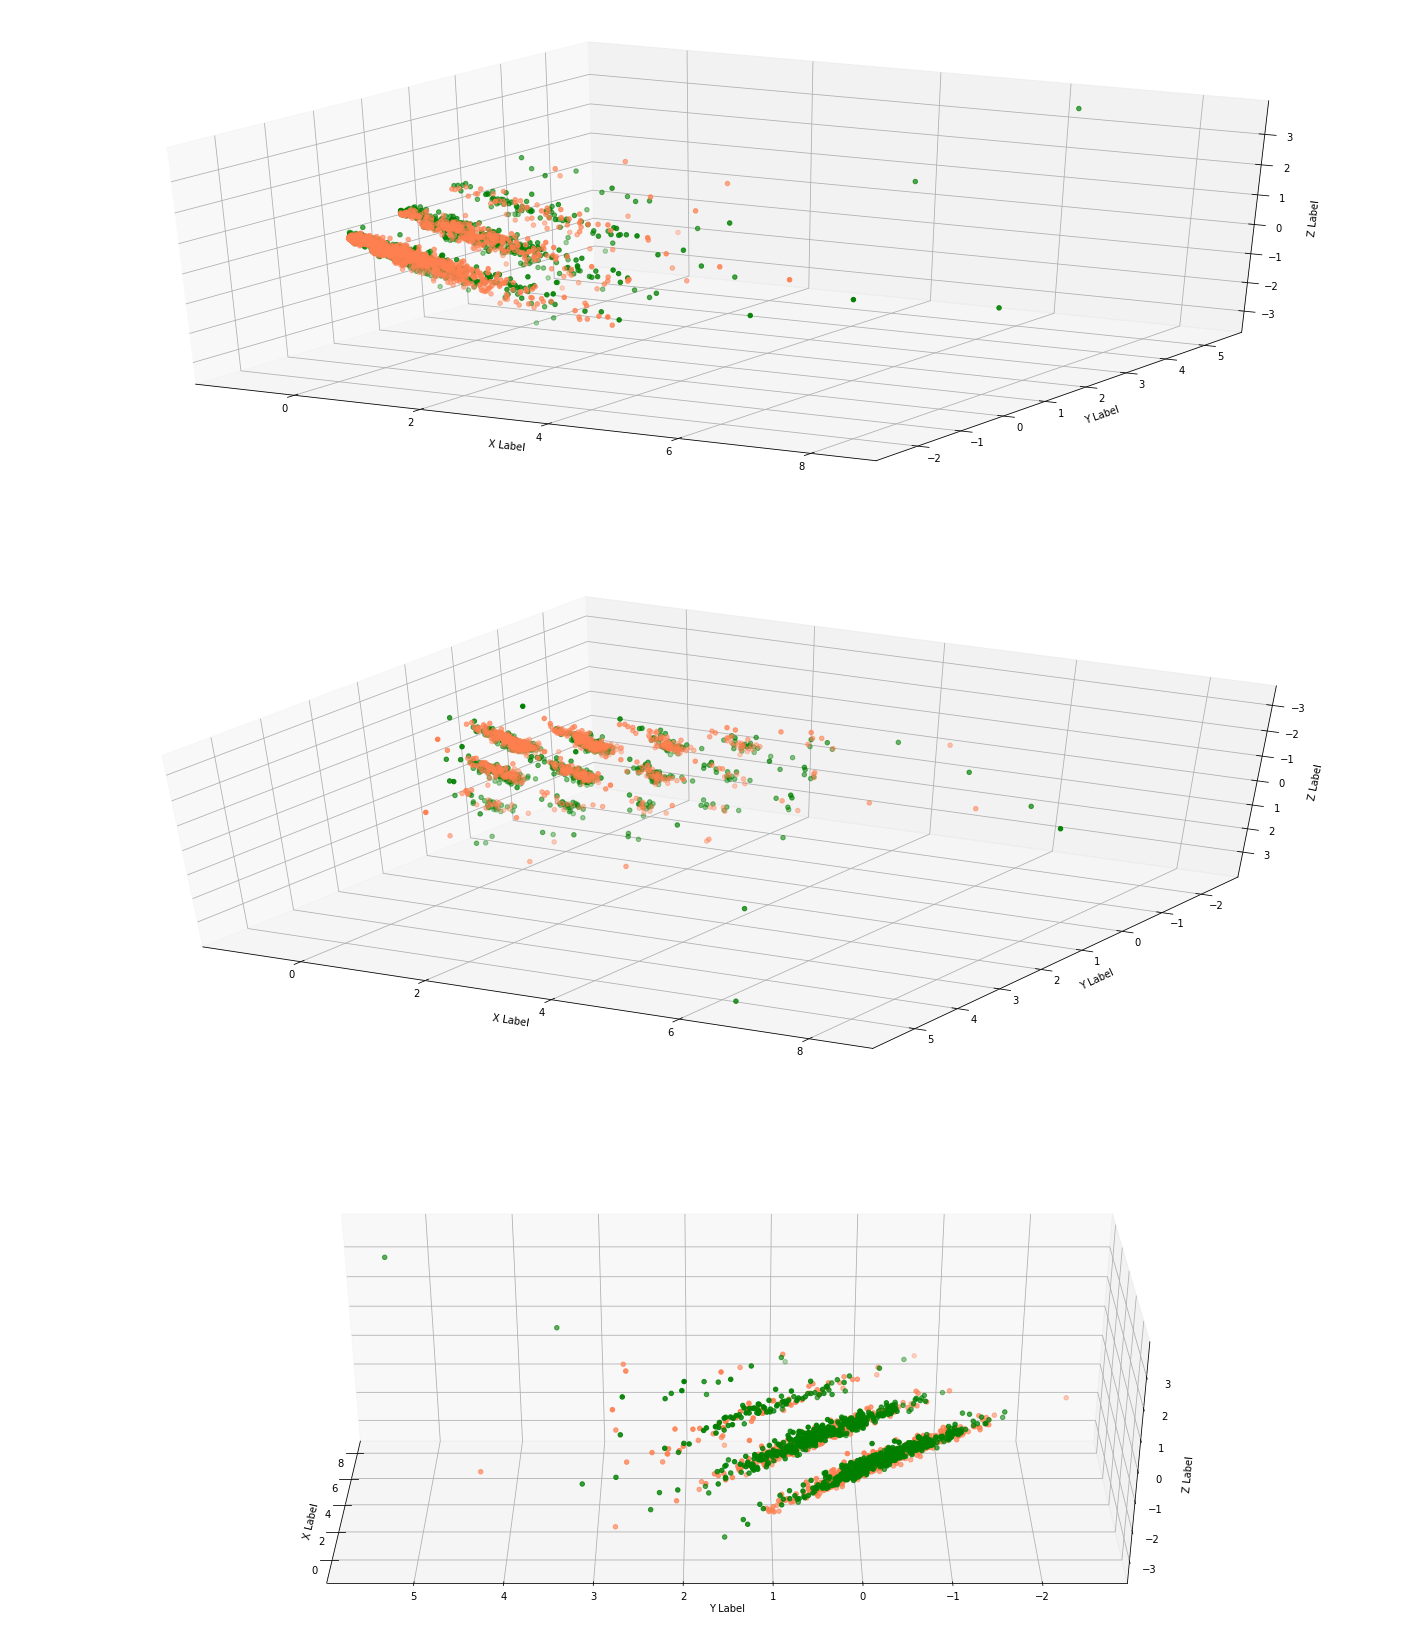

In [79]:
# Answer here
#we find that for the first plot and the second in 3D plots, the pattern is different.
#In first plot, we can see that the scatter are in a whole bar shape.
#However, in the second, we can see that the scatters are in a ladder shape, which is a combination of different bars.

data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())

from mpl_toolkits.mplot3d import Axes3D
col = ['coral', 'green']

# plot
fig = plt.figure(figsize = (25,30))
ax = fig.add_subplot(311, projection='3d')

for c, s in zip(col, [0,1]):
    xs = data_reduced[data['score'] == s].T[0]
    ys = data_reduced[data['score'] == s].T[1]
    zs = data_reduced[data['score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

ax = fig.add_subplot(312, projection='3d')

for c, s in zip(col, [0,1]):
    xs = data_reduced[data['score'] == s].T[0]
    ys = data_reduced[data['score'] == s].T[1]
    zs = data_reduced[data['score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(azim=60,elev=315)


ax = fig.add_subplot(313, projection='3d')

for c, s in zip(col, [0,1]):
    xs = data_reduced[data['score'] == s].T[0]
    ys = data_reduced[data['score'] == s].T[1]
    zs = data_reduced[data['score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(azim=180)


plt.show()



In [80]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))

In [81]:
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

In [82]:
term_frequencies[0]

1

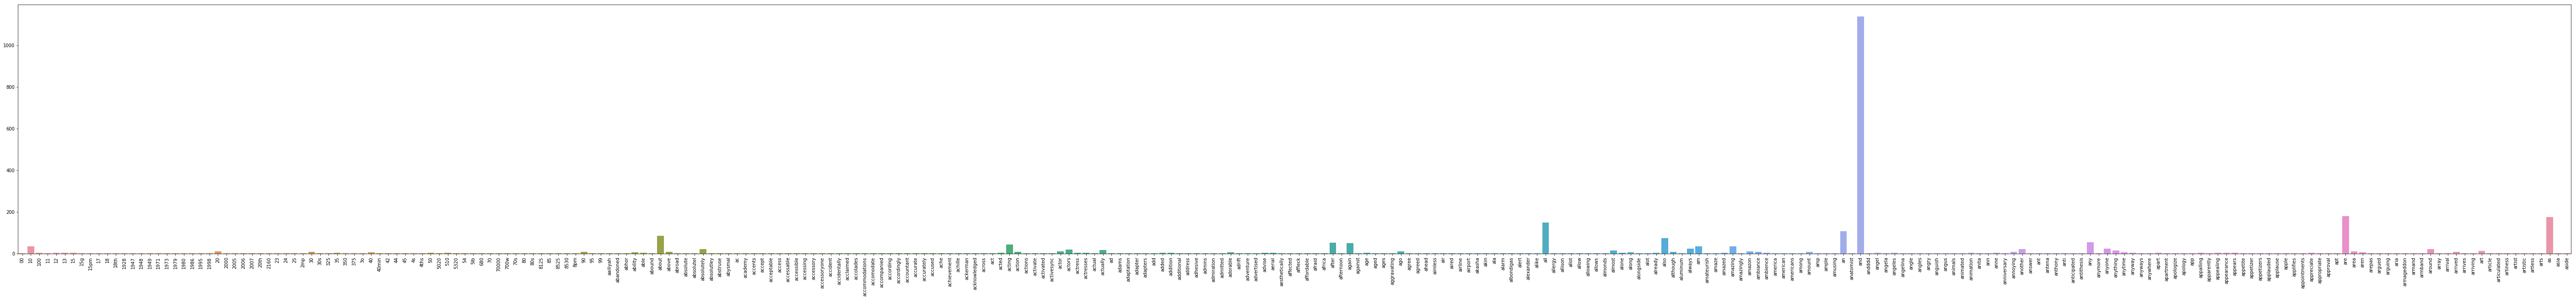

In [83]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

---

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [84]:
# Answer here
fig = go.Figure()
fig.add_trace(go.Bar(x=['term_' + s for s in count_vect.get_feature_names()[:300]],y=term_frequencies.tolist()[:300]))
fig.update_layout(xaxis_tickangle=-90)
fig.show()

---

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


[Text(0,0,'10'),
 Text(0,0,'about'),
 Text(0,0,'absolutely'),
 Text(0,0,'acting'),
 Text(0,0,'after'),
 Text(0,0,'again'),
 Text(0,0,'all'),
 Text(0,0,'also'),
 Text(0,0,'always'),
 Text(0,0,'am')]

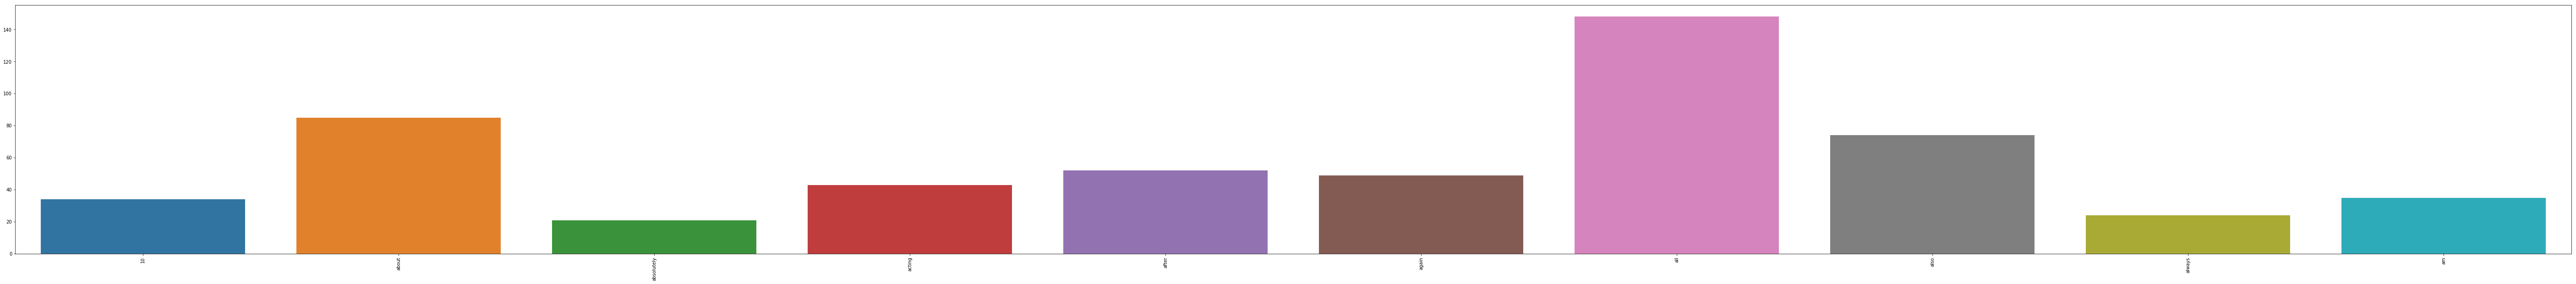

In [100]:
# Answer here
# Answer here
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=np.array(count_vect.get_feature_names())[term_frequencies>20][:10], y=term_frequencies[term_frequencies>20][:10])
g.set_xticklabels(np.array(count_vect.get_feature_names())[term_frequencies>20][:10], rotation = 90)

---

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

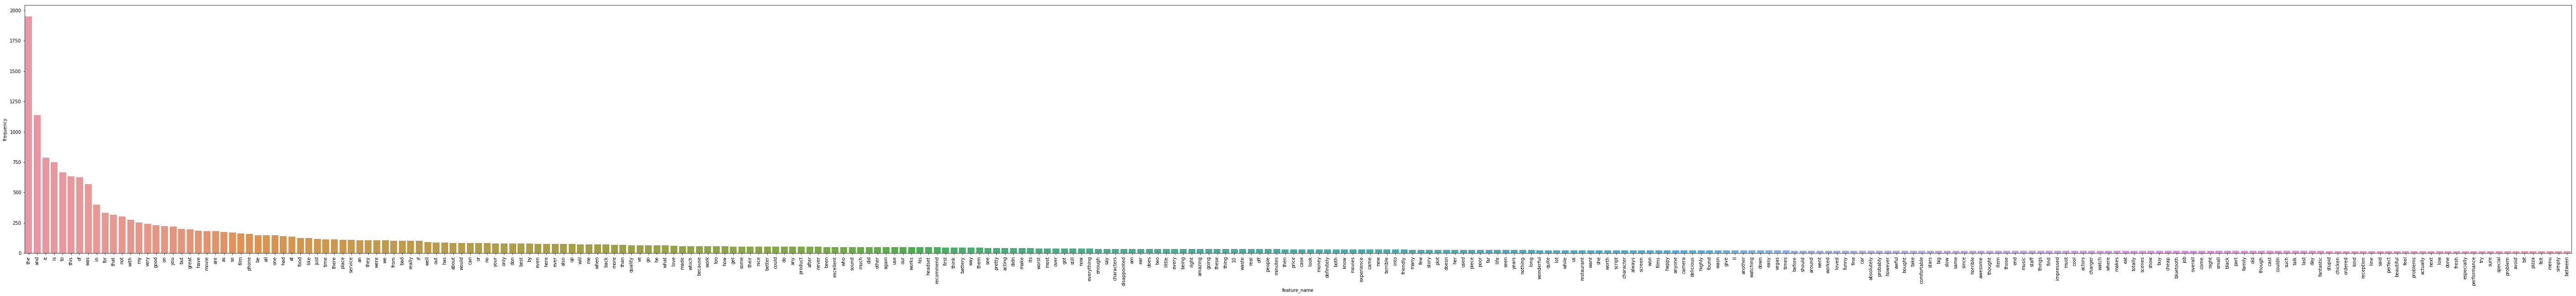

In [101]:
# Answer here
DATA = pd.DataFrame(data={'feature_name': count_vect.get_feature_names(), 'frequency': term_frequencies})
DATA = DATA.sort_values(by='frequency',ascending=False)
#draw the plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=DATA.feature_name[:300], 
            y=DATA.frequency[:300])
g.set_xticklabels(DATA.feature_name[:300], rotation = 90);

---

Since we already have those term frequencies, we can also transform the values in that vector into the log distribution. All we need is to import the `math` library provided by python and apply it to the array of values of the term frequency vector. This is a typical example of attribute transformation. Let's go for it. The log distribution is a technique to visualize the term frequency into a scale that makes you easily visualize the distribution in a more readable format. In other words, the variations between the term frequencies are now easy to observe. Let us try it out!

In [87]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

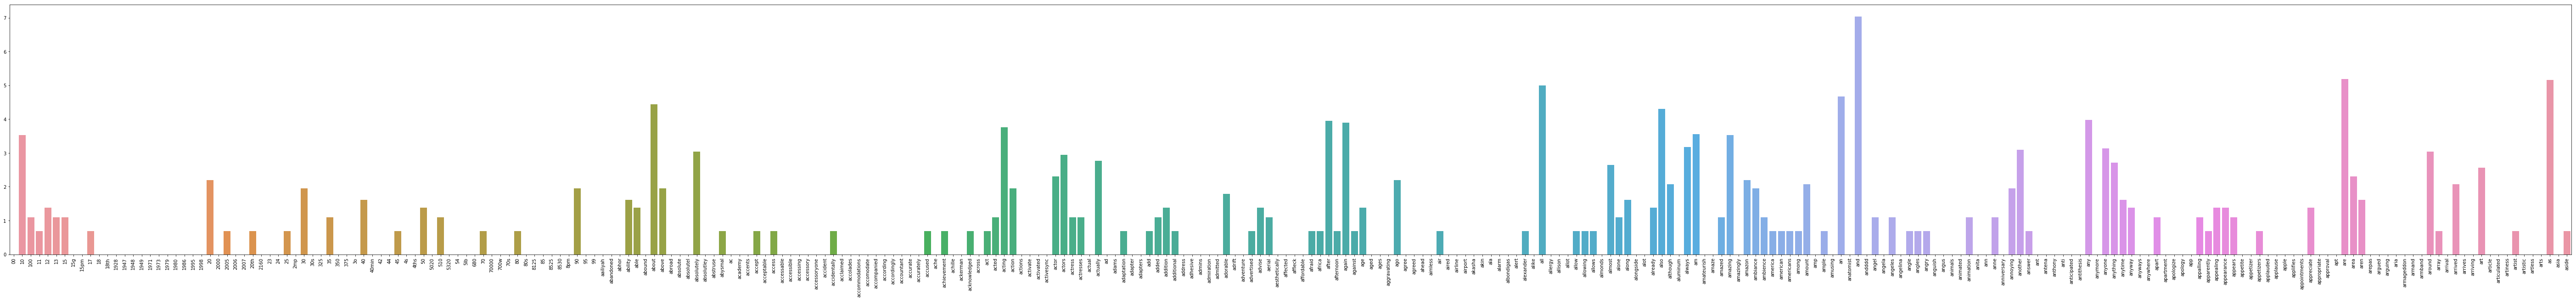

In [88]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

Besides observing a complete transformation on the disrtibution, notice the scale on the y-axis. The log distribution in our unsorted example has no meaning, but try to properly sort the terms by their frequency, and you will see an interesting effect. Go for it!

---

### 5.6 Discretization and Binarization
In this section we are going to discuss a very important pre-preprocessing technique used to transform the data, specifically categorical values, into a format that satisfies certain criteria required by particular algorithms. Given our current original dataset, we would like to transform one of the attributes, `category_name`, into four binary attributes. In other words, we are taking the category name and replacing it with a `n` asymmetric binary attributes. The logic behind this transformation is discussed in detail in the recommended Data Mining text book (please refer to it on page 58). People from the machine learning community also refer to this transformation as one-hot encoding, but as you may become aware later in the course, these concepts are all the same, we just have different prefrence on how we refer to the concepts. Let us take a look at what we want to achieve in code. 

In [89]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [90]:
mlb = preprocessing.LabelBinarizer()

In [91]:
mlb.fit(data.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [92]:
mlb.classes_

array([0., 1.])

In [93]:
data['bin_category'] = mlb.transform(data['score']).tolist()

In [94]:
data[0:9]

,sentence,score,unigrams,bin_category
0,Wow... Loved this place.,1.0,"[Wow, ..., Loved, this, place, .]",[1]
1,Crust is not good.,0.0,"[Crust, is, not, good, .]",[0]
2,Not tasty and the texture was just nasty.,0.0,"[Not, tasty, and, the, texture, was, just, nas...",[0]
3,Stopped by during the late May bank holiday of...,1.0,"[Stopped, by, during, the, late, May, bank, ho...",[1]
4,The selection on the menu was great and so wer...,1.0,"[The, selection, on, the, menu, was, great, an...",[1]
5,Now I am getting angry and I want my damn pho.,0.0,"[Now, I, am, getting, angry, and, I, want, my,...",[0]
6,Honeslty it didn't taste THAT fresh.),0.0,"[Honeslty, it, did, n't, taste, THAT, fresh, ....",[0]
7,The potatoes were like rubber and you could te...,0.0,"[The, potatoes, were, like, rubber, and, you, ...",[0]
8,The fries were great too.,1.0,"[The, fries, were, great, too, .]",[1]


---

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [105]:
# Answer here
#We have only one category


---

# 6. Data Exploration

Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Let's take 3 documents and compare them.

In [96]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

Let's look at our emails.

In [97]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['We ordered the duck rare and it was pink and tender on the inside with a nice char on the outside.']
['Our server was fantastic and when he found out the wife loves roasted garlic and bone marrow, he added extra to our meal and another marrow to go!']
['My fiancé and I came in the middle of the day and we were greeted and seated right away.']


In [98]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [99]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.281718
Cosine Similarity using count bw 1 and 3: 0.465475
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## Third Part
#### meaningful new data visualizations

In [137]:
#Find data label balance or not

print('yelp')
print(yelp_data.score.value_counts())
print('amazon')
print(amazon_data.score.value_counts())
print('imdb')
print(imdb_data.score.value_counts())
   



yelp
1    500
0    500
Name: score, dtype: int64
amazon
1    500
0    500
Name: score, dtype: int64
imdb
1    500
0    500
Name: score, dtype: int64


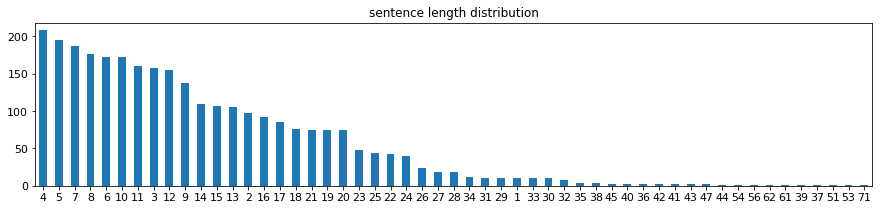

In [142]:
#count the sentence length distribution
data.word_in_sentence.value_counts().plot(kind = 'bar',title = 'sentence length distribution',rot = 0, fontsize = 11, figsize = (15,3))

## Third Part
#### TF-IDF features

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data.sentence)
print(tfidf.shape)

print(tfidf)


(2964, 5153)
  (0, 5110)	0.6724017477954211
  (0, 2710)	0.5631636553961696
  (0, 4556)	0.24796287476493115
  (0, 3349)	0.4113842480465172
  (1, 1111)	0.8197654991127447
  (1, 2426)	0.26090561191059614
  (1, 3062)	0.3466179528992942
  (1, 1992)	0.3738566341071036
  (2, 3062)	0.2364552589596667
  (2, 4482)	0.4610436094566732
  (2, 216)	0.15203231728496697
  (2, 4529)	0.12754990221482151
  (2, 4521)	0.538851523535974
  (2, 4966)	0.19675041587853687
  (2, 2492)	0.29915609181958747
  (2, 2993)	0.5230476458194275
  (3, 2710)	0.23643229557269177
  (3, 216)	0.08597005724712771
  (3, 4529)	0.07212593079614935
  (3, 4311)	0.30470558597918784
  (3, 646)	0.18626051339091346
  (3, 1427)	0.2607073693688402
  (3, 2571)	0.30470558597918784
  (3, 2803)	0.2607073693688402
  (3, 388)	0.3324653699427381
  :	:
  (2960, 1741)	0.19382578210671753
  (2960, 3491)	0.35448589413427556
  (2960, 3925)	0.2883546401750715
  (2960, 4909)	0.4085535651854093
  (2960, 3672)	0.4085535651854093
  (2961, 2426)	0.2268720244

## Third Part
#### Naive Bayes classifier 

In [123]:
data[:5]

,sentence,score,unigrams,bin_category,word_in_sentence
0,Wow... Loved this place.,1.0,"[Wow, ..., Loved, this, place, .]",[1],4
1,Crust is not good.,0.0,"[Crust, is, not, good, .]",[0],4
2,Not tasty and the texture was just nasty.,0.0,"[Not, tasty, and, the, texture, was, just, nas...",[0],8
3,Stopped by during the late May bank holiday of...,1.0,"[Stopped, by, during, the, late, May, bank, ho...",[1],15
4,The selection on the menu was great and so wer...,1.0,"[The, selection, on, the, menu, was, great, an...",[1],12


In [130]:
# calculaate TF-IDF
#vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,2), norm='l2')
#vectorizer.fit(data['sentence'])
# split train/test set (no validation set here)
train_df, test_df = train_test_split(data, test_size=0.25)


x_train = vectorizer.transform(train_df['sentence']).toarray()
y_train = [int(i) for i in train_df['score']]

x_test = vectorizer.transform(test_df['sentence']).toarray()
y_test = [int(i) for i in test_df['score']]

gnb = GaussianNB()

clf = gnb.fit(x_train, y_train)
pred = clf.predict(x_test)


print('accuracy')
print(accuracy_score(y_test,pred))
print('precision')
print(precision_score(y_test,pred))
print('recall')
print(recall_score(y_test,pred))

accuracy
0.6572199730094467
precision
0.6804511278195489
recall
0.5171428571428571


## Fourth
### inefficent parts

#### Sparse for some plot
In my opinion, there exist some inefficient due to the sparseness of data. For instance, TF-IDF and heat map sometimes will show nothing since the word occur in few sentences. 

#### Feature Engineering is needed
We apply some algorithms on the corpus like PCA, classifier or cosine similarity. But in the lab, we didn't mention some text mining technique like stopwords, non-alpha word,POS tagging and stemming. This surely will lower the accuracy and the fine of visualization. We should show the same meaning words in same form.
